<a href="https://colab.research.google.com/github/swilsonmfc/timeseries/blob/master/NeuralNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TimeSeries Neural Networks

# Install

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import convolve1d

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Flatten

# Neural Networks

## Neuron

![](https://miro.medium.com/max/2739/1*L9xLcwKhuZ2cuS8fF0ZjwA.png)

## Non-Linearity
![](https://www.researchgate.net/profile/Vivienne-Sze/publication/315667264/figure/fig3/AS:669951052496900@1536740186369/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial.png)

## Network

![](https://miro.medium.com/max/2622/1*eJ36Jpf-DE9q5nKk67xT0Q.jpeg)

## Back Propagation

![](https://miro.medium.com/max/2313/1*DcLWqOojI1b9jzQaLibUkQ.png)

# Univariate TimeSeries
* 

In [2]:
series = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

## Single Step

In [3]:
def subseries(series, steps=3):
    X, y = [], []
    size = len(series)
    for index in range(size):
        if index + steps > size - 1:
            break
        seqX = series[index:index + steps]
        seqY = series[index + steps]
        X.append(seqX)
        y.append(seqY)
    return np.array(X), np.array(y)

In [4]:
def subseries_pythonic(series, k):
  X = [series[i : i + k] for i in range(len(series) - k)]
  y = [series[i] for i in range(k, len(series))]
  return np.array(X), np.array(y)

### Data

In [5]:
steps = 3
X, y = subseries_pythonic(series, steps)
for index in range(len(X)):
    print(X[index], y[index])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90
[70 80 90] 100


### Model

In [6]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=2000, verbose=0)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


### Predict

In [8]:
X_pred = np.array([80, 90, 100]) # --> 110
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[111.826584]], dtype=float32)

In [9]:
X_pred = np.array([280, 290, 300]) # --> 310
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[348.62173]], dtype=float32)

In [10]:
X_pred = np.array([-70, -60, -50]) # --> -40
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[22.126738]], dtype=float32)

## Multi Step

In [11]:
def subseries_multi(series, steps=3, output=2):
    X, y = [], []
    size = len(series)
    for index in range(size):
        if index + steps > size - output:
            break
        seqX = series[index:index + steps]
        seqY = series[index + steps: index + steps + output]
        X.append(seqX)
        y.append(seqY)
    return np.array(X), np.array(y)

In [12]:
def subseries_multi_pythonic(series, k, steps):
  X = [series[i : i + k] for i in range(len(series) - k - steps + 1)]
  y = [series[i : i + steps] for i in range(k, len(series) - steps + 1)]
  return np.array(X), np.array(y)

### Data

In [13]:
steps  = 3
output = 2
X, y = subseries_multi_pythonic(series, steps, output)
for index in range(len(X)):
    print(X[index], y[index])

[10 20 30] [40 50]
[20 30 40] [50 60]
[30 40 50] [60 70]
[40 50 60] [70 80]
[50 60 70] [80 90]
[60 70 80] [ 90 100]


### Model

In [14]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=steps))
model.add(Dense(output))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=2000, verbose=0)

### Predict

In [15]:
X_pred = np.array([80, 90, 100]) # --> 110
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[109.63612, 121.23521]], dtype=float32)

In [16]:
X_pred = np.array([280, 290, 300]) # --> 310
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[312.0683 , 331.48703]], dtype=float32)

In [17]:
X_pred = np.array([-70, -60, -50]) # --> -40
X_pred = X_pred.reshape((1, X.shape[1]))
model.predict(X_pred)

array([[ 5.9791927, 36.7289   ]], dtype=float32)

# Recurrent Neural Networks

![](https://www.researchgate.net/publication/338553148/figure/fig1/AS:846868162551810@1578920512954/Unrolled-recurrent-neural-network-RNN-recurrent-neural-network.ppm)

* RNN
  * Train relatively quickly
  * Suffer from short term memory
* Challenges
  * http://proceedings.mlr.press/v28/pascanu13.pdf
  * Vanishing gradients --> Zero
  * Exploding gradients --> Infinity (NaN)

In [18]:
small_error = 0.01
large_error = 100

print(f'Vanishing {small_error ** 5}')
print(f'Exploding {large_error ** 5}')


Vanishing 1.0000000000000002e-10
Exploding 10000000000


# LSTM
* https://www.researchgate.net/publication/13853244_Long_Short-term_Memory
* Long short term memory
* How do we avoid vanishing gradients!
  * Short term memory
  * Long term memory
* Key takeaways:
  * Long term memory (Ct) can pass through
  * LSTM is computationally expensive
* Not the only approach
  * GRU Gated Recurrent Unit (Faster)

![](https://chunml.github.io/images/projects/creating-text-generator-using-recurrent-neural-network/LSTM.png)

## Data
* Our data is in [samples, input_features] shape
* We need data in [samples, timesteps, output_features] shape

In [19]:
series = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

## Reshape

### Input
* Input [samples, features]
* Input data has 7 samples
* Input data has 3 features

In [20]:
steps = 3
X, y = subseries_pythonic(series, k=steps)
print(X.shape, y.shape)

(7, 3) (7,)


### Output
* Reshaped [samples, timesteps, features]
* Reshaped data has 7 samples (rows in X)
* Reshaped data has 3 timesteps (our input data's features)
* Reshaped data has 1 feature (one value of the timestep at a time)

In [21]:
features = 1
X = X.reshape(X.shape[0], steps, features)
print(X.shape, y.shape)

(7, 3, 1) (7,)


## Model
* LSTM
* Input Shape

In [22]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(steps, features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=2000, verbose=0)

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


## Predict

In [24]:
X_pred = np.array([80, 90, 100])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred, verbose=0)
y_hat

array([[110.371826]], dtype=float32)

In [25]:
X_pred = np.array([280, 290, 300])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred, verbose=0)
y_hat

array([[344.5065]], dtype=float32)

In [26]:
X_pred = np.array([-80, -70, -60])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred, verbose=0)
y_hat

array([[3.7892663]], dtype=float32)

# Convolutions

### Sliding
* Imagine we're sliding a window across the sequence
* We look at just the values in the window (size)
* Then slide it to the right n positions (stride)

### Filters
* We take the values in the window and multiply by weights
* In Conv1D layers, we specify how many filters / kernels / feature maps we want
* When you hear filter / kernel / feature map think weights that we learn from data
* We randomly initiatlize a filter, but for illustrative purposes I set them
  * Identity
  * Doubler
* After we apply the kernel we sum the weighted values

In [27]:
def convolution1D(series, filter1D):
    values = []
    size = len(filter1D)
    for index in range(len(series) - size + 1):
        window   = series[index : index + size] 
        filtered = window * filter1D
        summed   = filtered.sum()
        print(f'Window {window}  * Filter {filter1D}  = {filtered}  --> Sum {summed}')
        values.append(summed)
    return values

In [28]:
# Identity
c = convolution1D(series, np.array([1,1,1]))
print(f'Convolution: {c}')

Window [10, 20, 30]  * Filter [1 1 1]  = [10 20 30]  --> Sum 60
Window [20, 30, 40]  * Filter [1 1 1]  = [20 30 40]  --> Sum 90
Window [30, 40, 50]  * Filter [1 1 1]  = [30 40 50]  --> Sum 120
Window [40, 50, 60]  * Filter [1 1 1]  = [40 50 60]  --> Sum 150
Window [50, 60, 70]  * Filter [1 1 1]  = [50 60 70]  --> Sum 180
Window [60, 70, 80]  * Filter [1 1 1]  = [60 70 80]  --> Sum 210
Window [70, 80, 90]  * Filter [1 1 1]  = [70 80 90]  --> Sum 240
Window [80, 90, 100]  * Filter [1 1 1]  = [ 80  90 100]  --> Sum 270
Convolution: [60, 90, 120, 150, 180, 210, 240, 270]


![](https://cdn-images-1.medium.com/max/1600/1*tfESmBDSXnJzBMFxPvqZzg.gif)

In [29]:
# Doubler
c = convolution1D(series, np.array([2,2,2]))
print(f'Convolution: {c}')

Window [10, 20, 30]  * Filter [2 2 2]  = [20 40 60]  --> Sum 120
Window [20, 30, 40]  * Filter [2 2 2]  = [40 60 80]  --> Sum 180
Window [30, 40, 50]  * Filter [2 2 2]  = [ 60  80 100]  --> Sum 240
Window [40, 50, 60]  * Filter [2 2 2]  = [ 80 100 120]  --> Sum 300
Window [50, 60, 70]  * Filter [2 2 2]  = [100 120 140]  --> Sum 360
Window [60, 70, 80]  * Filter [2 2 2]  = [120 140 160]  --> Sum 420
Window [70, 80, 90]  * Filter [2 2 2]  = [140 160 180]  --> Sum 480
Window [80, 90, 100]  * Filter [2 2 2]  = [160 180 200]  --> Sum 540
Convolution: [120, 180, 240, 300, 360, 420, 480, 540]


In [30]:
c = convolution1D(series, np.array([0, 0, 1]))

Window [10, 20, 30]  * Filter [0 0 1]  = [ 0  0 30]  --> Sum 30
Window [20, 30, 40]  * Filter [0 0 1]  = [ 0  0 40]  --> Sum 40
Window [30, 40, 50]  * Filter [0 0 1]  = [ 0  0 50]  --> Sum 50
Window [40, 50, 60]  * Filter [0 0 1]  = [ 0  0 60]  --> Sum 60
Window [50, 60, 70]  * Filter [0 0 1]  = [ 0  0 70]  --> Sum 70
Window [60, 70, 80]  * Filter [0 0 1]  = [ 0  0 80]  --> Sum 80
Window [70, 80, 90]  * Filter [0 0 1]  = [ 0  0 90]  --> Sum 90
Window [80, 90, 100]  * Filter [0 0 1]  = [  0   0 100]  --> Sum 100


## Scipy

In [31]:
weights = [1, 1, 1]
start = 1
end   = len(weights) - start

convolve1d(series, weights = weights, origin=start, mode='constant')[: -end]

array([ 60,  90, 120, 150, 180, 210, 240, 270])

## Conv1D

In [32]:
series = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

### Reshape

In [33]:
steps = 3
X, y = subseries_pythonic(series, k=steps)
print(X.shape, y.shape)

(7, 3) (7,)


In [34]:
features = 1
X = X.reshape(X.shape[0], steps, features)
print(X.shape, y.shape)

(7, 3, 1) (7,)


### Model

In [35]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(steps, features)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=2000, verbose=0)

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             96        
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 50)                3250      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,397
Trainable params: 3,397
Non-trainable params: 0
_________________________________________________________________


### Predict

In [37]:
X_pred = np.array([80, 90, 100])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[111.05156]], dtype=float32)

In [38]:
X_pred = np.array([280, 290, 300])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[342.75183]], dtype=float32)

In [39]:
X_pred = np.array([-80, -70, -60])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[35.164097]], dtype=float32)

# Improving
* What helps it learn?
* Model complexity or more data?

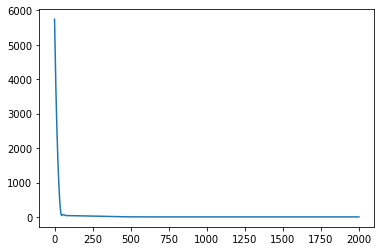

In [40]:
plt.plot(history.history['loss'])

## More Layers

In [41]:
steps = 3
features = 1
series = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
X, y = subseries_pythonic(series, k=steps)
X = X.reshape(X.shape[0], steps, features)

In [42]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(steps, features)))
model.add(Conv1D(64, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=500, verbose=0)

In [43]:
X_pred = np.array([80, 90, 100])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[113.38599]], dtype=float32)

In [44]:
X_pred = np.array([580, 590, 600])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[695.34467]], dtype=float32)

In [45]:
X_pred = np.array([12.75, 22.75, 32.75])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[39.313656]], dtype=float32)

## More Data

In [46]:
steps = 3
features = 1
series = np.arange(-5000, 5000, 10)
X, y = subseries_pythonic(series, k=steps)
X = X.reshape(X.shape[0], steps, features)

In [47]:
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=(steps, features)))
model.add(Conv1D(64, 2, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X, y, epochs=2000, verbose=0)

In [48]:
X_pred = np.array([80, 90, 100])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[110.18188]], dtype=float32)

In [49]:
X_pred = np.array([5800, 5810, 5820])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[5830.0957]], dtype=float32)

In [50]:
X_pred = np.array([-8000, -7990, -7980])
X_pred = X_pred.reshape((1, steps, features))
y_hat = model.predict(X_pred)
y_hat

array([[-7970.912]], dtype=float32)

# Summary
* Many ways to use neural networks for sequences (time series)
  * Focus on buiding sequences (numpy)
  * Nets give you flexibility in composition
* Feed Forward Network
* Recurrent (LSTM)
* 1D Convolutional Network